In [23]:
from os.path import basename
from typing import Dict, Callable

from pathlib import Path
import pickle

import pandas as pd

%matplotlib inline

In [ ]:
# %load /home/lukasz/github/projects/textlytics/textlytics/analysis/nlp_architect.py
import pickle
from collections import namedtuple
from pathlib import Path
from typing import Callable, Dict


Metrics = namedtuple('Metrics', ['precision', 'recall', 'f1'])

MODEL_INFO_PARAMS = {
    'train_file': lambda f_name: Path(f_name).name,
    'eval': lambda results: str(results[1]['aspect']),
    'epoch': str,
    'external_embedding_model': str
}


def print_models_info(models_info_path: Path, model_info_params: Dict[str, Callable]):
    for model_info_path in models_info_path.glob('*'):
        with open(model_info_path.as_posix(), 'rb') as model_info_file:
            model_info = pickle.load(model_info_file)
            for info, fn in model_info_params.items():
                print(info + ': ' + fn(model_info[info]))
            print()


def get_model_metrics(models_info_path: Path) -> Dict[str, Metrics]:
    metrics = {}
    for model_info_path in models_info_path.glob('*'):
        with open(model_info_path.as_posix(), 'rb') as model_info_file:
            model_info = pickle.load(model_info_file)
            model_name = Path(model_info['test_file']).stem.replace('-test', '')
            evals = model_info['eval'][1]['aspect']
            metrics[model_name] = Metrics(*evals)
    return metrics


if __name__ == '__main__':
    metrics = get_model_metrics(Path('/home/lukasz/github/nlp/nlp-architect/examples/aspect_extraction/models-baseline'))
    pass


In [31]:
models_info_baseline_path = Path('../models-baseline/')

In [32]:
models_info_baseline_path.absolute()

PosixPath('/home/lukasz/github/nlp/nlp-architect/examples/aspect_extraction/notebooks/../models-baseline')

In [33]:
list(models_info_baseline_path.glob('*.conll'))[:2]

[PosixPath('../models-baseline/model-info-Apex AD2600 Progressive-scan DVD player-train.conll'),
 PosixPath('../models-baseline/model-info-Linksys Router-train.conll')]

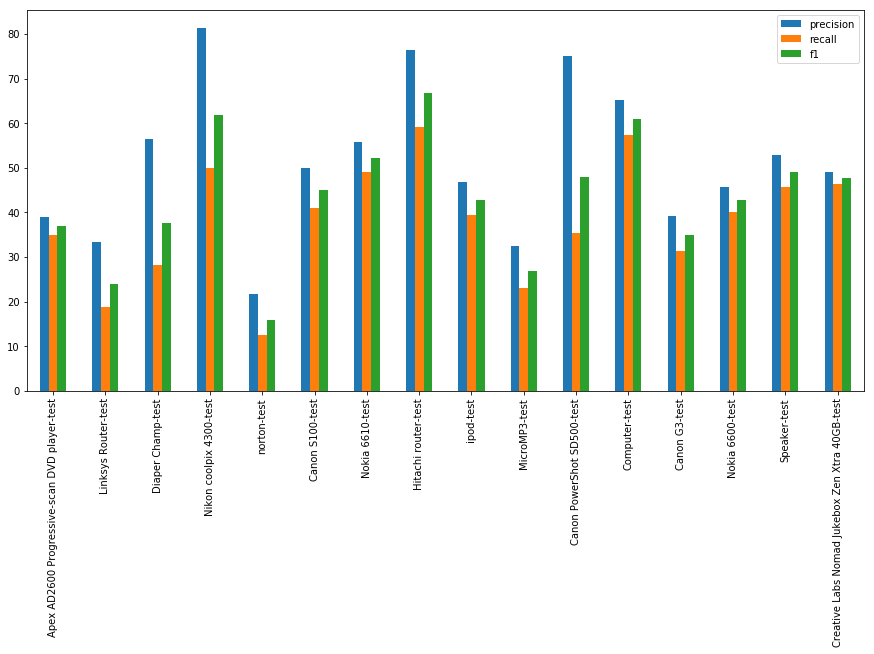

In [34]:
pd.DataFrame.from_dict(metrics, orient='index').plot(kind='bar', figsize=(15,7))

In [22]:
models_info_tmp_path = Path('../models-tmp/')

In [49]:
print_models_info(models_info_tmp_path, model_info_params)

eval: (44.0, 28.947368421052634, 34.920634920634924)
train_file: ipod-train.conll



In [50]:
print_models_info(Path('../models-wtf/'), model_info_params)

eval: (34.090909090909086, 37.5, 35.714285714285715)
train_file: Apex AD2600 Progressive-scan DVD player-train.conll

eval: (36.36363636363637, 16.666666666666664, 22.857142857142858)
train_file: Linksys Router-train.conll

eval: (58.620689655172406, 36.95652173913043, 45.33333333333333)
train_file: Diaper Champ-train.conll

eval: (20.0, 3.8461538461538463, 6.451612903225806)
train_file: Nikon coolpix 4300-train.conll

eval: (40.74074074074074, 27.500000000000004, 32.835820895522396)
train_file: norton-train.conll

eval: (43.90243902439025, 40.909090909090914, 42.352941176470594)
train_file: Canon S100-train.conll

eval: (50.0, 53.06122448979592, 51.48514851485149)
train_file: Nokia 6610-train.conll

eval: (69.04761904761905, 59.183673469387756, 63.73626373626373)
train_file: Hitachi router-train.conll

eval: (25.0, 5.263157894736842, 8.695652173913043)
train_file: ipod-train.conll

eval: (35.0, 22.950819672131146, 27.72277227722772)
train_file: MicroMP3-train.conll

eval: (57.14285714